## Exploratory Data Analysis - AMCAT Data Analysis

### Introduction

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.

### Objective

To Explore and make the estimation from the dataset using salary as the target variable.

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Dataset
df = pd.read_csv("data.csv")

#### Displaying head, shape and description of the data

In [3]:
# first 5 observation of data
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
# Shape of data --- shape will show how many features(columns) and observation(rows) there are in dataset
df.shape

(3998, 39)

In [5]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [6]:
# Describing the data
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [7]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

### Data Cleaning

In [8]:
# Checking missing values
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [9]:
# removing unwanted columns
df = df.drop(["Unnamed: 0", "ID"], axis = 1)

In [10]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [11]:
categorical_df = df.select_dtypes(include = ['object'])
numerical_df = df.select_dtypes(include = ['int64','float64'])

In [12]:
def categorical_univariate_analysis(categorical_data):
    for col_name in categorical_data:
        print("*"*15, col_name, "*"*15)
        print(categorical_data[col_name].agg(['count','unique','nunique']))
        print("Value counts: \n", categorical_data[col_name].value_counts())
        print()

In [13]:
categorical_univariate_analysis(categorical_df)

*************** DOJ ***************
count                                                   3998
unique     [6/1/12 0:00, 9/1/13 0:00, 6/1/14 0:00, 7/1/11...
nunique                                                   81
Name: DOJ, dtype: object
Value counts: 
 7/1/14 0:00     199
6/1/14 0:00     180
8/1/14 0:00     178
9/1/14 0:00     142
1/1/14 0:00     142
               ... 
11/1/15 0:00      1
11/1/09 0:00      1
8/1/04 0:00       1
9/1/09 0:00       1
2/1/07 0:00       1
Name: DOJ, Length: 81, dtype: int64

*************** DOL ***************
count                                                   3998
unique     [present, 3/1/15 0:00, 5/1/15 0:00, 7/1/15 0:0...
nunique                                                   67
Name: DOL, dtype: object
Value counts: 
 present         1875
4/1/15 0:00      573
3/1/15 0:00      124
5/1/15 0:00      112
1/1/15 0:00       99
                ... 
3/1/05 0:00        1
10/1/15 0:00       1
2/1/10 0:00        1
2/1/11 0:00        1
10/1/10 0:00 

 ### Observation of categorical columns 

* DOJ,DOL and DOB columns are given in timestamp format.
* The column JobCity contains -1 value which are NaN.
* The column 10board contains 0 value which are missing value.
* The column 12board contains 0 value which are missing value.
* CollegeState column contain 'Union Territory' which is not a specific state.

In [14]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*15, col_name, "*"*15)
        print(numerical_data[col_name].agg(['min','max','mean','median','std']))
        print()

In [15]:
numerical_univariate_analysis(numerical_df)

*************** Salary ***************
min       3.500000e+04
max       4.000000e+06
mean      3.076998e+05
median    3.000000e+05
std       2.127375e+05
Name: Salary, dtype: float64

*************** 10percentage ***************
min       43.000000
max       97.760000
mean      77.925443
median    79.150000
std        9.850162
Name: 10percentage, dtype: float64

*************** 12graduation ***************
min       1995.000000
max       2013.000000
mean      2008.087544
median    2008.000000
std          1.653599
Name: 12graduation, dtype: float64

*************** 12percentage ***************
min       40.000000
max       98.700000
mean      74.466366
median    74.400000
std       10.999933
Name: 12percentage, dtype: float64

*************** CollegeID ***************
min           2.000000
max       18409.000000
mean       5156.851426
median     3879.000000
std        4802.261482
Name: CollegeID, dtype: float64

*************** CollegeTier ***************
min       1.000000
max       

In [16]:
# Replace 'present' into today's datetime format

df['DOL'] = df['DOL'].replace('present', pd.to_datetime('today').normalize())


In [17]:
date_columns = ['DOJ','DOB']
for col in date_columns:
    df[col] = pd.to_datetime(df[col])
    

In [18]:
# Calculate Experience in year and add it to existing dataframe

df['Experience'] = pd.to_datetime(df['DOL']).dt.year - pd.to_datetime(df['DOJ']).dt.year


In [19]:
df.columns

Index(['Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Experience'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   float64       
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   object        
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeID              3998 non-null   int64         
 13  Col

In [21]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience
0,420000.0,2012-06-01,2024-02-23 00:00:00,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,12
1,500000.0,2013-09-01,2024-02-23 00:00:00,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,11
2,325000.0,2014-06-01,2024-02-23 00:00:00,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,10
3,1100000.0,2011-07-01,2024-02-23 00:00:00,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,13
4,200000.0,2014-03-01,3/1/15 0:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1


In [22]:
df.isin([-1,'NaN']).sum()

Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscientiousness           0
agreeablen

In [23]:
# JobCity column contains -1 value, replace it with 'NA'

df['JobCity'] = df['JobCity'].replace('-1',np.nan)

In [24]:
df['JobCity'].mode()


0    Bangalore
Name: JobCity, dtype: object

In [25]:
# in jobcity column we can fill nan values with mode
df['JobCity'] = df['JobCity'].fillna(df['JobCity'].mode()[0])

In [26]:
df['JobCity'].value_counts()

Bangalore           1088
Noida                368
Hyderabad            335
Pune                 290
Chennai              272
                    ... 
Asansol                1
Tirunelvelli           1
Ernakulam              1
Nanded                 1
Asifabadbanglore       1
Name: JobCity, Length: 338, dtype: int64

In [27]:
# 10board and 12board columns are contain 0 value, we can replace it with 'NA'
df[['10board','12board']] = df[['10board','12board']].replace('0',np.nan)

In [28]:
df['10board'] = df['10board'].fillna(df['10board'].mode()[0])
df['12board'] = df['12board'].fillna(df['12board'].mode()[0])

In [29]:
# CollegeState column contain unspecified state name which is Union Territory so we can replace it with unknown
df['CollegeState'] = df['CollegeState'].replace('Union Territory','unknown')

In [30]:
df['CollegeState'].unique()

array(['Andhra Pradesh', 'Madhya Pradesh', 'Uttar Pradesh', 'Delhi',
       'Karnataka', 'Tamil Nadu', 'West Bengal', 'Maharashtra', 'Haryana',
       'Telangana', 'Orissa', 'Punjab', 'Kerala', 'Gujarat', 'Rajasthan',
       'Chhattisgarh', 'Uttarakhand', 'Jammu and Kashmir', 'Jharkhand',
       'Himachal Pradesh', 'Bihar', 'Assam', 'Goa', 'Sikkim', 'unknown',
       'Meghalaya'], dtype=object)

In [31]:
df['Domain'] = df['Domain'].replace(-1, df['Domain'].median(), inplace = True)

In [32]:
df['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [33]:
Specialization_name = {'electronics and communication engineering': 'ECE',
'computer science & engineering': 'CSE',
'information technology': 'CSE',
'computer engineering': 'CSE',
'computer application': 'CSE',
'mechanical engineering': 'ME',
'electronics and electrical engineering': 'EEE',
'electronics & telecommunications': 'ECE',
'electrical engineering': 'EE',
'electronics & instrumentation eng': 'ECE',
'civil engineering': 'CE',
'electronics and instrumentation engineering': 'ECE',
'information science engineering': 'CSE',
'instrumentation and control engineering': 'ECE',
'electronics engineering': 'ECE',
'biotechnology': 'Other',
'other': 'Other',
'industrial & production engineering': 'Other',
'applied electronics and instrumentation': 'ECE',
'chemical engineering': 'Other',
'computer science and technology': 'CSE',
'telecommunication engineering': 'ECE',
'mechanical and automation': 'ME',
'automobile/automotive engineering': 'ME',
'instrumentation engineering': 'ECE',
'mechatronics': 'ME',
'aeronautical engineering': 'ME',
'electronics and computer engineering': 'ECE',
'electrical and power engineering': 'EE',
'biomedical engineering': 'Other',
'information & communication technology': 'CSE',
'industrial engineering': 'Other',
'computer science': 'CSE',
'metallurgical engineering': 'Other',
'power systems and automation': 'EE',
'control and instrumentation engineering': 'ECE',
'mechanical & production engineering': 'ME',
'embedded systems technology': 'ECE',
'polymer technology': 'Other',
'computer and communication engineering': 'CSE',
'information science': 'CSE',
'internal combustion engine': 'ME',
'computer networking': 'CSE',
'ceramic engineering': 'Other',
'electronics': 'ECE',
'industrial & management engineering': 'Other' }

In [34]:
df['Specialization'] = df['Specialization'].map(Specialization_name)

In [35]:
df['Specialization'].unique()

array(['CSE', 'ECE', 'ME', 'EEE', 'EE', 'CE', 'Other'], dtype=object)

In [36]:
df['Specialization'].value_counts()

CSE      2288
ECE      1124
ME        220
EEE       196
EE         85
Other      56
CE         29
Name: Specialization, dtype: int64

## univariate Analysis (Visualization)

<AxesSubplot:xlabel='Gender', ylabel='count'>

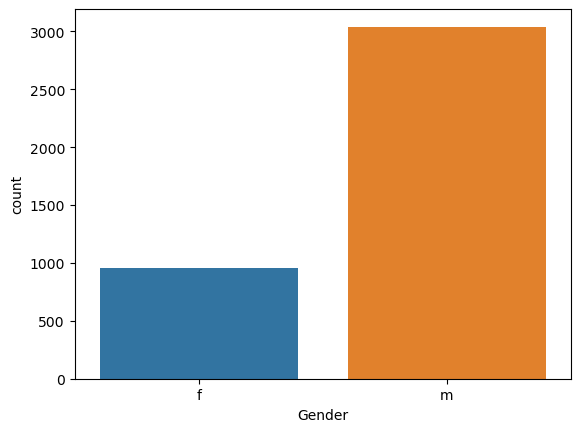

In [37]:
sns.countplot(x = 'Gender',data = df)


As we can see there are 3 time more men than women employed.

<AxesSubplot:>

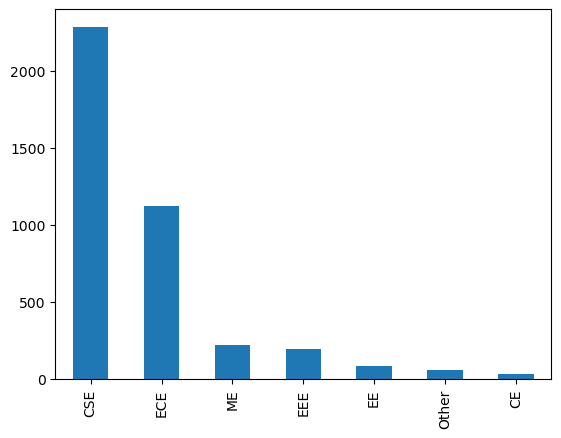

In [38]:
df['Specialization'].value_counts().plot.bar()

This plot shows that most of the Amcat aspirants are from CS background.

<AxesSubplot:xlabel='Degree', ylabel='count'>

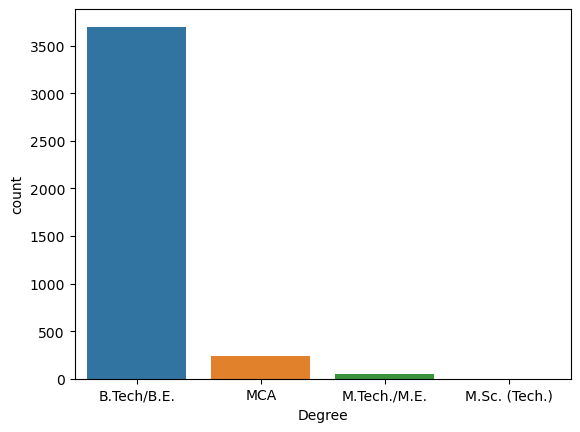

In [39]:
sns.countplot(x = 'Degree', data = df)

Most of the Amcat aspirants are from B.Tech/B.E background.

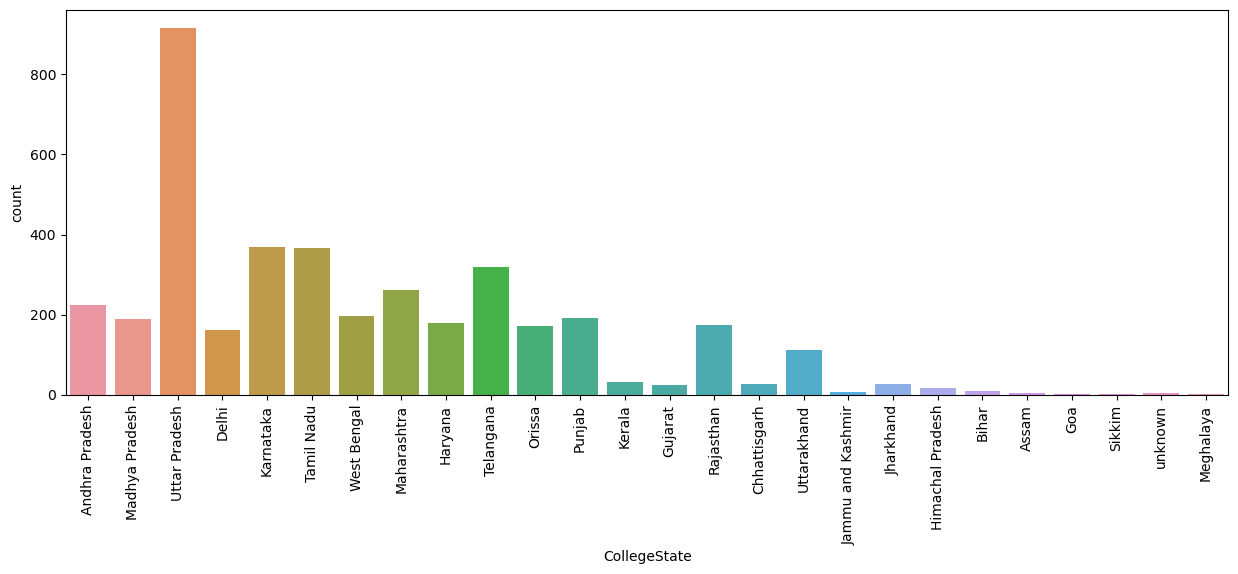

In [40]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'CollegeState', data = df)
plt.xticks(rotation = 90)
plt.show()

As we can see that most of the aspirants college state is Uttar Pradesh.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

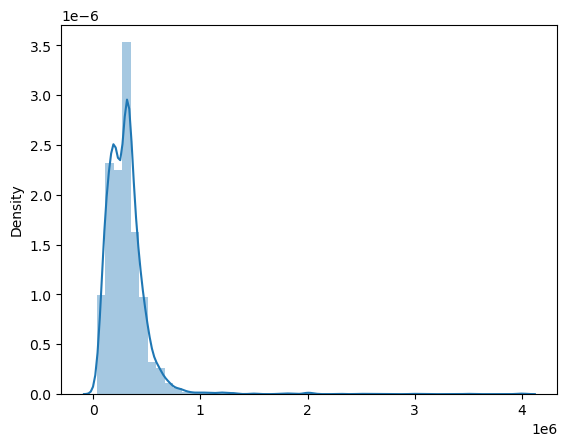

In [41]:
sns.distplot(x = df['Salary'])

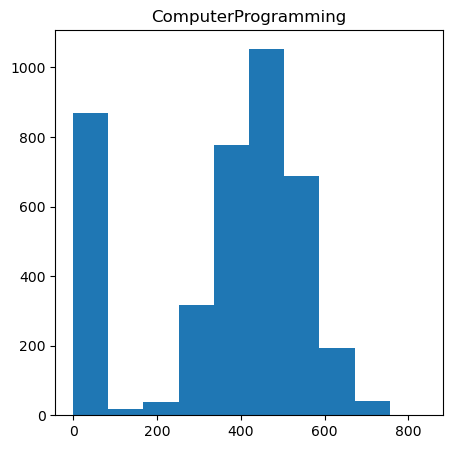

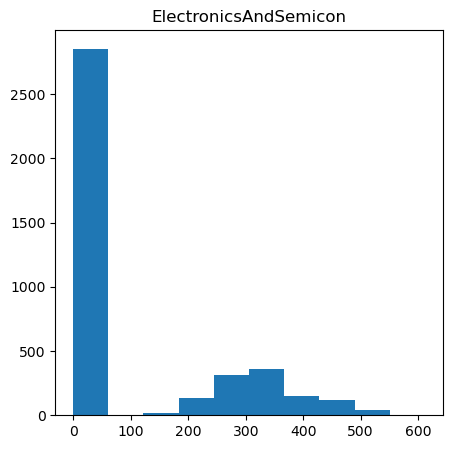

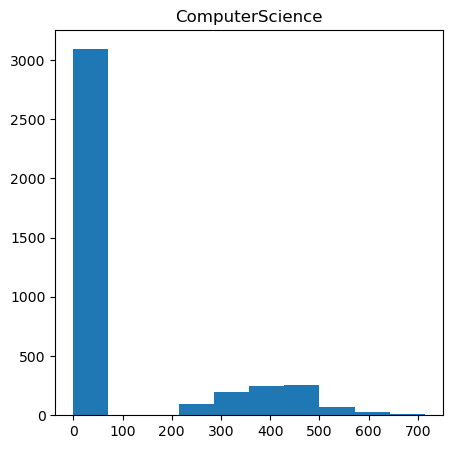

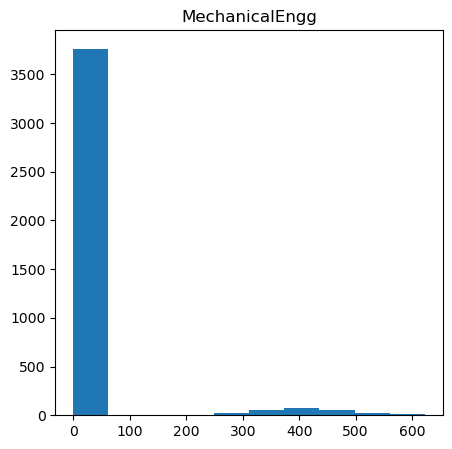

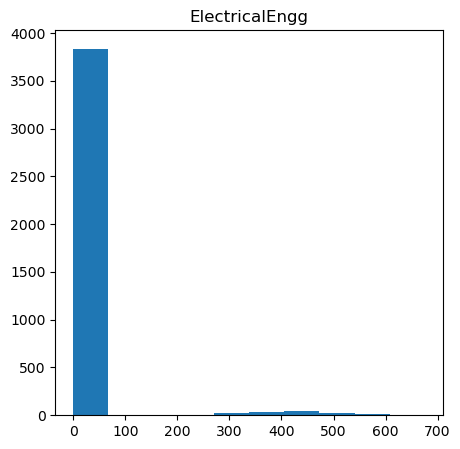

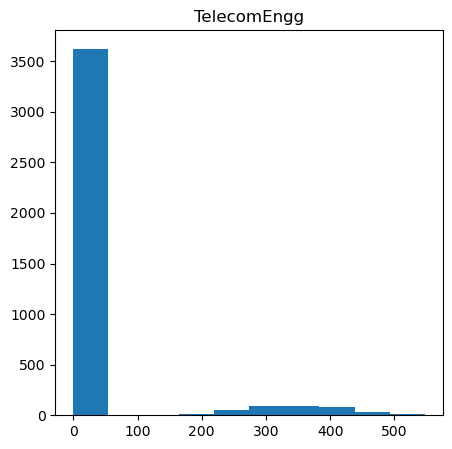

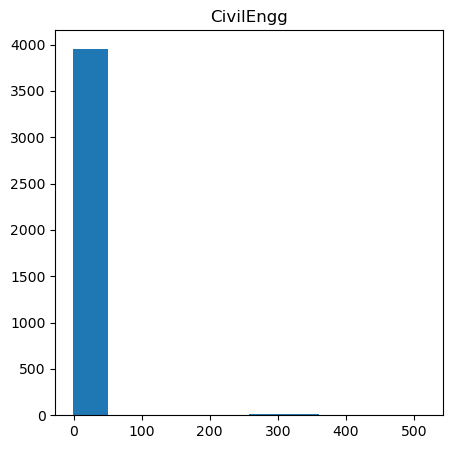

In [42]:
cols = ['ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg',]

for col in cols:
    plt.figure(figsize = (5,5))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

<AxesSubplot:xlabel='Salary'>

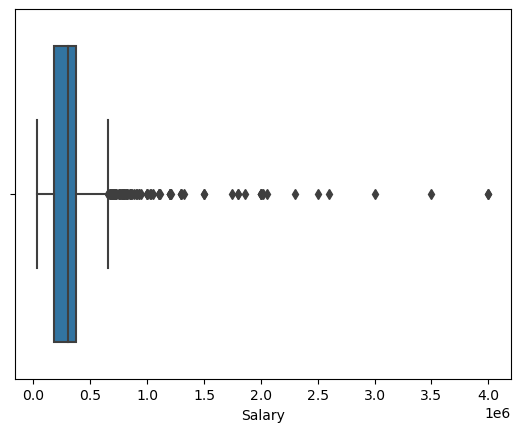

In [43]:
sns.boxplot(x = 'Salary', data = df)

Salary column contains outliers and we can remove them by IQR method.

### Removing Outliers

In [44]:
# Removing outliers from Salary column

q1 = df['Salary'].quantile(q = 0.25)
q3 = df['Salary'].quantile(q = 0.75)

In [45]:
q1

180000.0

In [46]:
q3

370000.0

In [47]:
IQR = q3 - q1
IQR

190000.0

In [48]:
lower_boundary = q1 - (1.5 * IQR)
upper_boundary = q3 + (1.5 * IQR)

outliers = df[(df['Salary'] < lower_boundary) | (df['Salary'] > upper_boundary)]

df.drop(outliers.index, axis = 0, inplace = True)


<AxesSubplot:xlabel='Salary'>

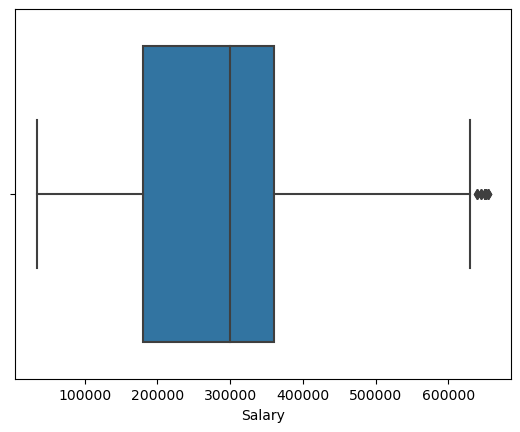

In [49]:
sns.boxplot(x = 'Salary', data = df)

## Bivariate Analysis (Visualization)

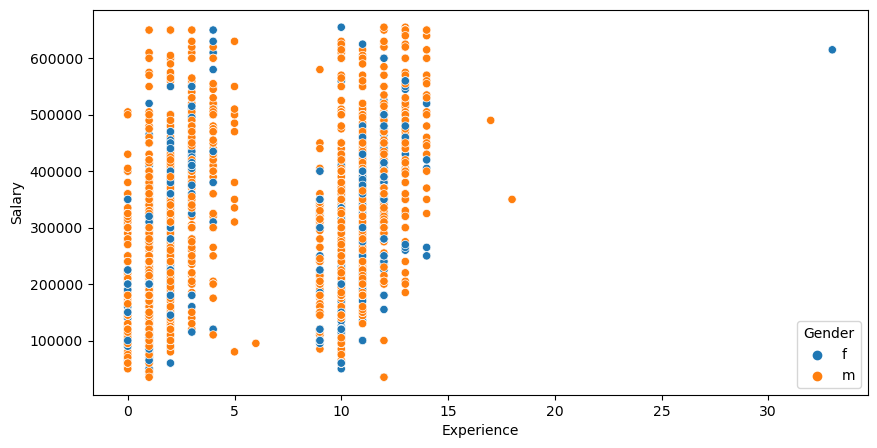

In [50]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = df['Experience'],y = df['Salary'],hue = df['Gender'])
plt.show()

<AxesSubplot:xlabel='Experience', ylabel='Salary'>

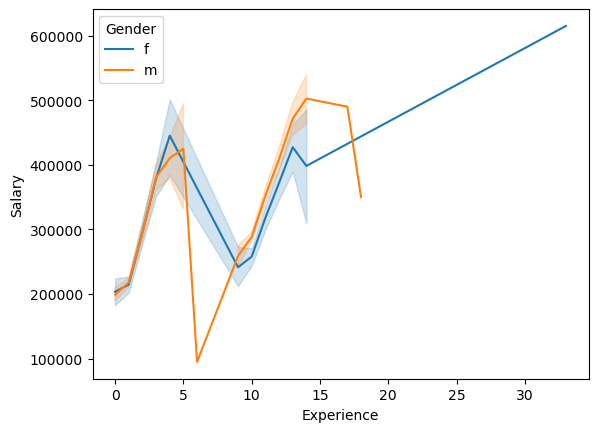

In [51]:
sns.lineplot(x = df['Experience'],y = df['Salary'],hue = df['Gender'])

* We can see that women with 33 years of experience and men with 18 years of experience has maximun salary.
* Compare to women, men has less experience with high Salary.

In [52]:
# Top 10 high pay with designation
max_Salary_Designation = list(df.sort_values("Salary",ascending=False)["Designation"].unique())[:10]
high_pay_Designation = df[df['Designation'].isin(max_Salary_Designation)]
high_pay_Designation.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience
1,500000.0,2013-09-01,2024-02-23 00:00:00,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,...,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637,11
26,345000.0,2011-01-01,10/1/13 0:00,senior software engineer,Bangalore,m,1988-02-05,90.88,karnataka state education examination board,2006,...,313,-1,-1,320,0.8192,0.1888,-1.7954,1.8249,1.1343,2
32,360000.0,2013-10-01,2024-02-23 00:00:00,application developer,Noida,f,1991-09-14,87.00,cbse,2009,...,-1,-1,-1,-1,-0.7335,-0.4536,-1.0659,1.1601,-0.4776,11
84,445000.0,2011-11-01,2024-02-23 00:00:00,software test engineer,Pune,f,1987-05-10,73.33,cbse,2004,...,-1,-1,-1,-1,-2.2720,-0.2793,-1.2148,0.8848,-0.7615,13
106,340000.0,2014-12-01,5/1/15 0:00,application developer,Navi Mumbai,f,1993-08-14,85.80,cbse,2010,...,-1,-1,-1,-1,0.8463,1.0449,0.0100,-0.2344,0.4805,1


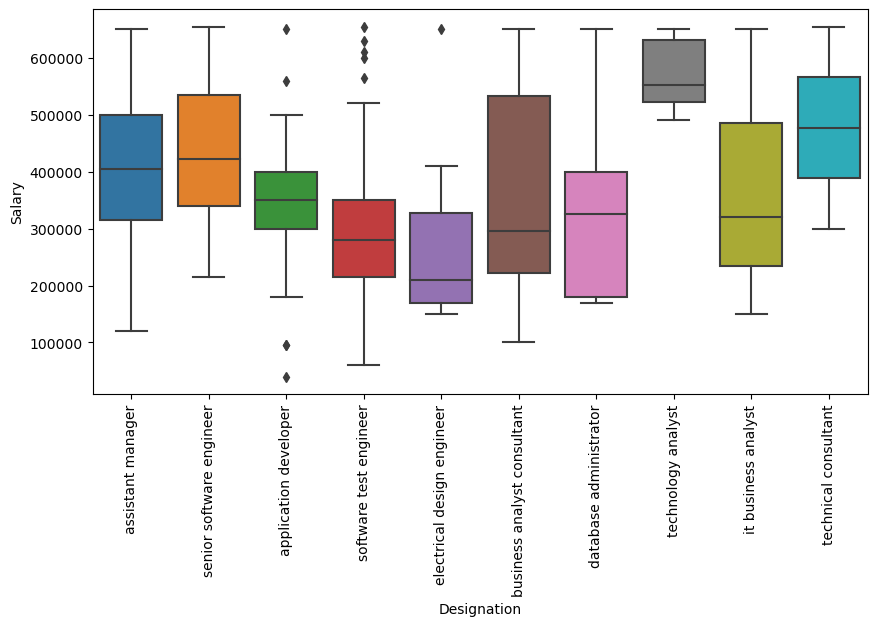

In [53]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'Designation', y = 'Salary', data=high_pay_Designation)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='collegeGPA', ylabel='Salary'>

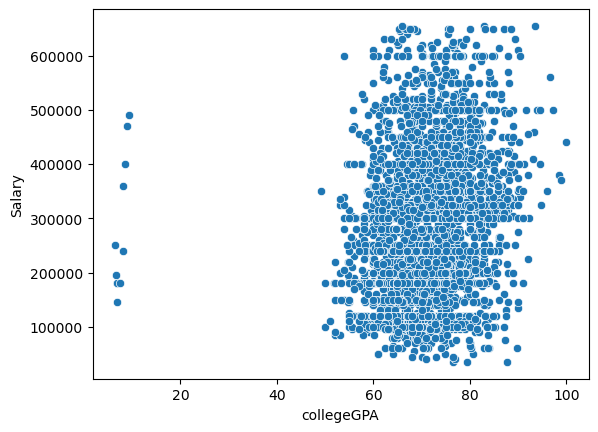

In [54]:
sns.scatterplot(x = df['collegeGPA'], y = df['Salary'])

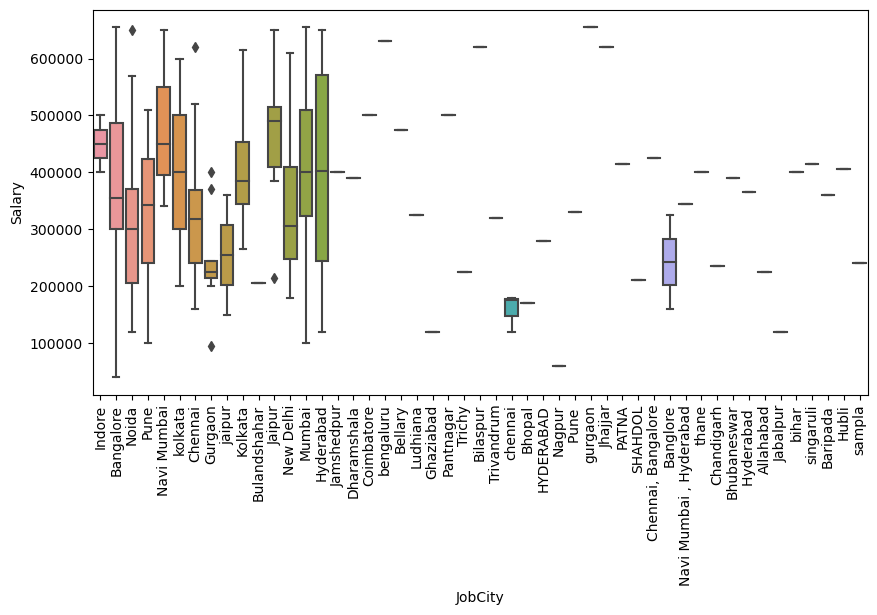

In [55]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "JobCity", y = 'Salary', data = high_pay_Designation)
plt.xticks(rotation = 90)
plt.show()

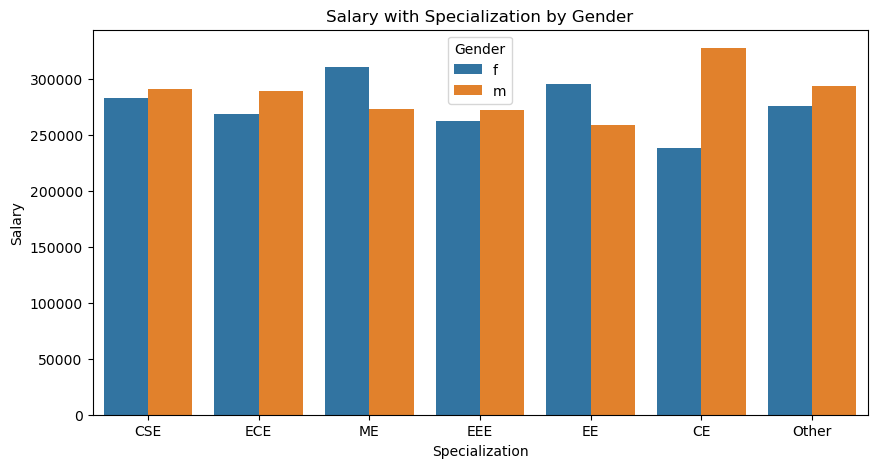

In [56]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Specialization', y = 'Salary', data = df, hue= 'Gender', ci=None)
plt.title("Salary with Specialization by Gender")
plt.show()

By seeing this plot we can say that Civil Engineering males are earning more and female with Mechanical Engineering are earning more.

<AxesSubplot:xlabel='CollegeTier', ylabel='Salary'>

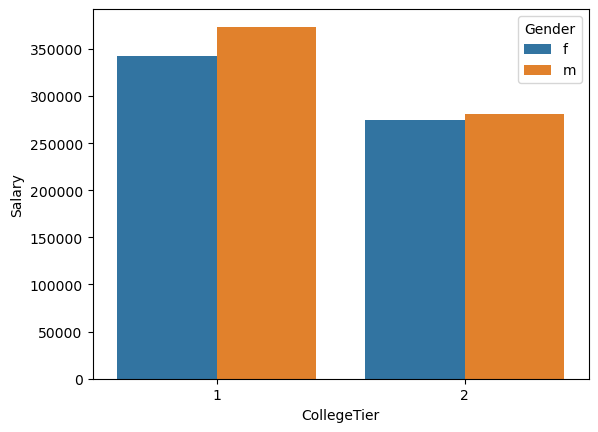

In [57]:
sns.barplot(x = 'CollegeTier', y = 'Salary', data= df, hue='Gender',ci=None)

* College Tier 1 men are earning higher than women.
* College Tier 2 men and women are almost earning same.

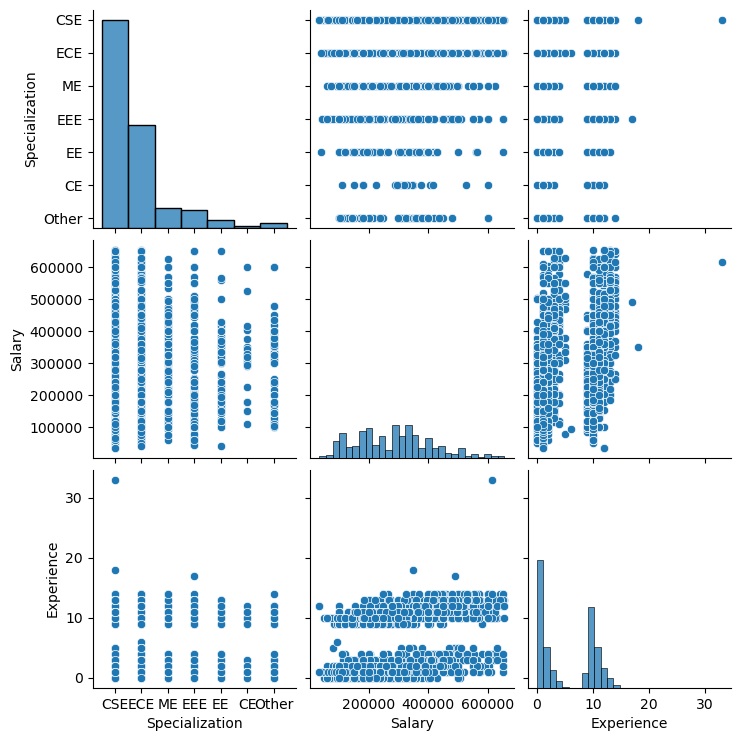

In [86]:
sns.pairplot(data=df,vars=['Specialization','Salary','Experience'])


<AxesSubplot:xlabel='12percentage', ylabel='Salary'>

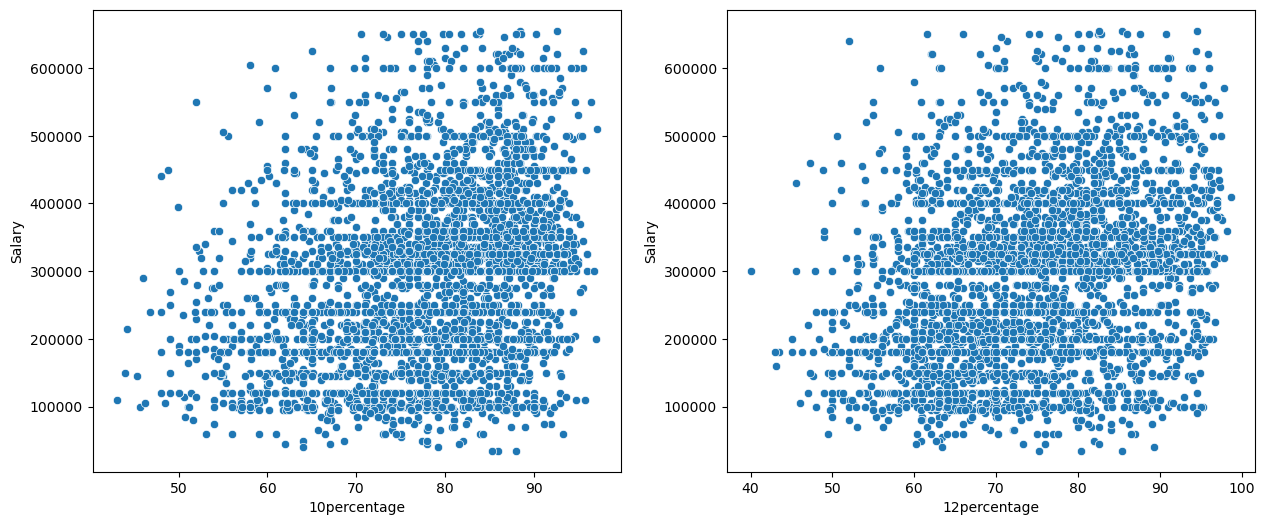

In [58]:
fig,axs = plt.subplots(figsize=(15,6),ncols=2)
sns.scatterplot(x=df['10percentage'],y=df['Salary'],ax=axs[0])
sns.scatterplot(x=df['12percentage'],y=df['Salary'],ax=axs[1])

In [59]:
df.corr()

,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience
Salary,1.000000,0.285109,-0.145522,0.279822,-0.152268,-0.176372,0.202115,-0.152268,0.034788,-0.014709,...,0.002958,-0.049974,-0.006164,0.025260,-0.056743,0.061862,-0.032233,-0.054238,-0.009846,0.368176
10percentage,0.285109,1.000000,0.274817,0.641618,0.024637,-0.113926,0.313050,0.024637,0.111919,-0.014176,...,0.056655,0.076703,0.049853,0.024383,0.071055,0.134495,-0.001998,-0.130137,0.036261,0.144296
12graduation,-0.145522,0.274817,1.000000,0.263745,0.251150,0.011340,0.095924,0.251150,-0.004899,0.013236,...,0.048406,0.122718,0.017797,0.007746,0.105171,0.045374,0.064779,-0.086932,-0.016130,0.055404
12percentage,0.279822,0.641618,0.263745,1.000000,0.025218,-0.096116,0.350895,0.025218,0.126822,-0.013181,...,0.045123,0.064934,0.045004,0.014011,0.060163,0.102059,-0.005182,-0.092252,0.005667,0.136345
CollegeID,-0.152268,0.024637,0.251150,0.025218,1.000000,0.065470,0.022045,1.000000,0.005312,-0.000582,...,-0.006475,0.022677,0.025378,0.019567,0.073396,-0.006200,0.005597,-0.013680,-0.011409,-0.035482
CollegeTier,-0.176372,-0.113926,0.011340,-0.096116,0.065470,1.000000,-0.080896,0.065470,-0.100727,-0.005886,...,-0.009052,0.002193,-0.009243,-0.023291,0.051436,-0.033021,0.012960,0.010442,-0.014819,-0.020281
collegeGPA,0.202115,0.313050,0.095924,0.350895,0.022045,-0.080896,1.000000,0.022045,0.019138,0.009015,...,-0.030161,0.055166,-0.004252,-0.025302,0.068747,0.067025,-0.036093,-0.069066,0.024494,0.103851
CollegeCityID,-0.152268,0.024637,0.251150,0.025218,1.000000,0.065470,0.022045,1.000000,0.005312,-0.000582,...,-0.006475,0.022677,0.025378,0.019567,0.073396,-0.006200,0.005597,-0.013680,-0.011409,-0.035482
CollegeCityTier,0.034788,0.111919,-0.004899,0.126822,0.005312,-0.100727,0.019138,0.005312,1.000000,0.008422,...,-0.050100,0.011489,0.050898,-0.029930,0.012101,0.003096,-0.008536,0.003728,-0.018691,0.009298
GraduationYear,-0.014709,-0.014176,0.013236,-0.013181,-0.000582,-0.005886,0.009015,-0.000582,0.008422,1.000000,...,-0.068504,0.008395,0.004185,0.002180,-0.013576,-0.002983,0.008419,-0.000559,0.017021,0.016296


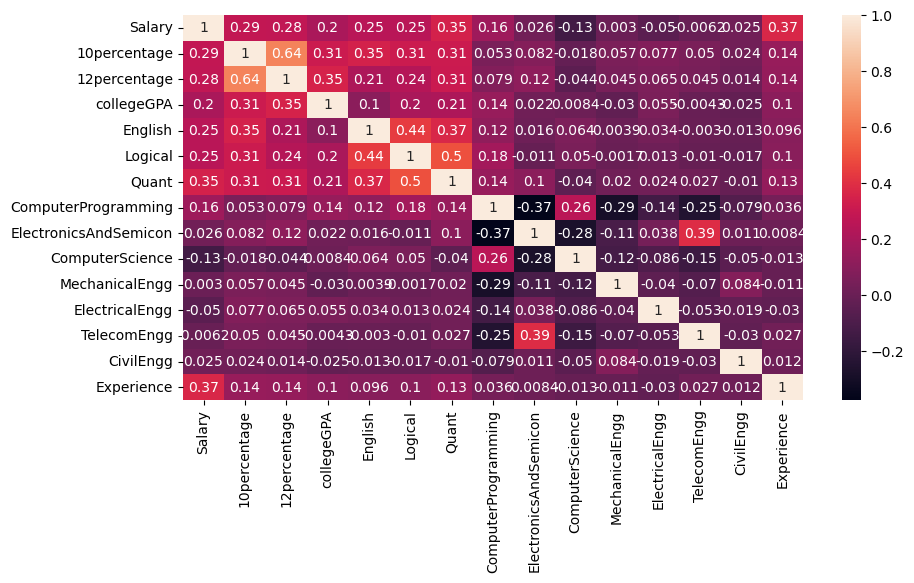

In [99]:
plt.figure(figsize=(10,5))
sns.heatmap(df[["Salary", "10percentage","12percentage","collegeGPA","English","Logical","Quant",
               "ComputerProgramming","ElectronicsAndSemicon","ComputerScience","MechanicalEngg","ElectricalEngg",
               "TelecomEngg","CivilEngg","Experience"]].corr(), annot=True)
plt.show()

In [103]:
df["Degree"].unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

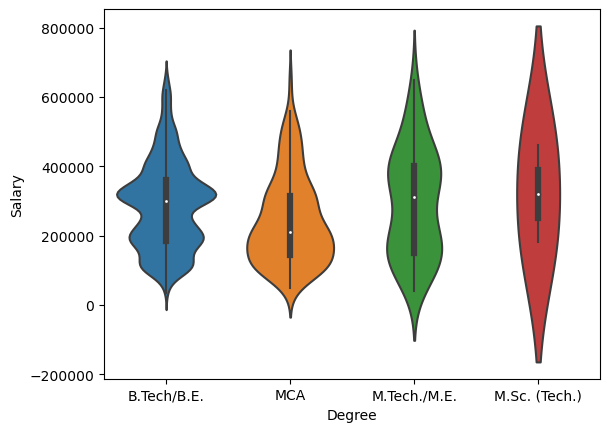

In [108]:
sns.violinplot(x = df['Degree'], y = df["Salary"])
plt.show()

## Research Questions

Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” 

In [60]:
research_df = df[(df['Specialization']=='CSE') & (df["Designation"].isin(['programming analyst','software engineer','hardware engineer','associate engineer']))\
                & (df["Experience"] == 0)]

In [61]:
research_df

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Experience
734,300000.0,2015-06-01,6/1/15 0:00,software engineer,Noida,m,1993-04-09,88.00,cbse,2011,...,-1,-1,-1,-1,-0.1590,-0.4536,-0.2974,0.5262,-1.0524,0
888,110000.0,2014-10-01,2/1/14 0:00,software engineer,Pune,m,1991-01-16,66.46,state board,2009,...,-1,-1,-1,-1,1.5644,-0.1206,0.0100,0.5262,0.6721,0
1066,300000.0,2012-02-01,4/1/12 0:00,software engineer,Bangalore,m,1988-04-17,82.00,cbse,2006,...,-1,-1,-1,-1,-0.5719,1.1248,0.8171,-0.9953,0.1864,0
1478,120000.0,2013-07-01,8/1/13 0:00,software engineer,Bangalore,m,1992-10-03,93.00,cbse,2010,...,-1,-1,-1,-1,-1.4517,-1.4526,-0.7585,0.7798,-1.6273,0
2000,315000.0,2015-03-01,4/1/15 0:00,software engineer,Bangalore,m,1992-06-21,86.80,cbse,2009,...,-1,-1,-1,-1,0.2718,0.7119,-1.2196,1.1601,0.2889,0
2092,200000.0,2015-02-01,4/1/15 0:00,software engineer,Pune,f,1993-12-13,81.00,cbse,2010,...,-1,-1,-1,-1,0.2718,0.2124,0.0100,1.0333,0.4805,0
2184,100000.0,2015-02-01,4/1/15 0:00,software engineer,Bangalore,m,1991-02-14,58.60,cbse,2009,...,-1,-1,-1,-1,0.9900,0.3789,-1.5270,-0.7415,0.8637,0
2298,180000.0,2013-01-01,9/1/13 0:00,software engineer,Noida,m,1989-04-14,82.00,cbse,2007,...,-1,-1,-1,-1,1.9011,1.9048,-0.7794,-1.5828,-0.2875,0
2728,110000.0,2014-01-01,4/1/14 0:00,software engineer,Gurgaon,m,1991-11-14,74.00,cbse,2009,...,-1,-1,-1,-1,-1.5953,0.5454,-0.7585,0.5262,-0.6692,0
2968,430000.0,2014-05-01,8/1/14 0:00,software engineer,Hyderabad,m,1992-05-19,83.00,state board,2010,...,-1,-1,-1,-1,-0.7335,-0.4536,0.1637,1.0333,-0.2859,0


In [62]:
research_df.groupby(['Specialization','Designation'])[['Salary', 'Experience','Gender']].value_counts().reset_index()\
.rename(columns = ({0:"All"}))

,Specialization,Designation,Salary,Experience,Gender,All
0,CSE,software engineer,300000.0,0,m,3
1,CSE,software engineer,110000.0,0,m,2
2,CSE,software engineer,100000.0,0,m,1
3,CSE,software engineer,120000.0,0,m,1
4,CSE,software engineer,180000.0,0,m,1
5,CSE,software engineer,200000.0,0,f,1
6,CSE,software engineer,240000.0,0,m,1
7,CSE,software engineer,315000.0,0,m,1
8,CSE,software engineer,430000.0,0,m,1


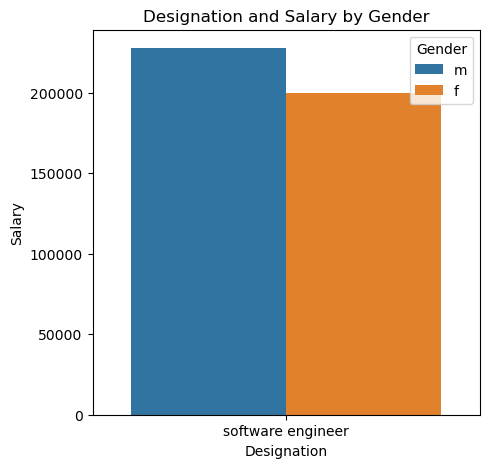

In [63]:
plt.figure(figsize=(5,5))
sns.barplot(x = "Designation", y = "Salary",hue = "Gender", data = research_df, ci = None)
plt.title("Designation and Salary by Gender")
plt.show()

* The Statement by Times of India article dated Jan 18, 2019 is correct. As we can say that after doing computer science engineering we can earn up to 2.5-3 lakhs as software engineer fresher.
* Compare to women, men are more as a software engineer.

## 1 sample T - test to verify the statement

In [64]:
from scipy import stats

p_value = stats.ttest_1samp(research_df['Salary'], popmean= 250000)[1]

if p_value < 0.05:
    print('We reject the null hypothesis and Average salary is not equal to 2.5lakhs')
else:
    print('We fail to reject null hypothesis and Avergae salary is equal to 2.5lakhs')

We fail to reject null hypothesis and Avergae salary is equal to 2.5lakhs


We are 95% confident that the above statements is correct.

### Que: Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)

In [44]:
observed = pd.crosstab(df['Gender'], df["Specialization"])
observed

Specialization,CE,CSE,ECE,EE,EEE,ME,Other
Gender,,,,,,,
f,6,603,270,17,34,12,15
m,23,1685,854,68,162,208,41


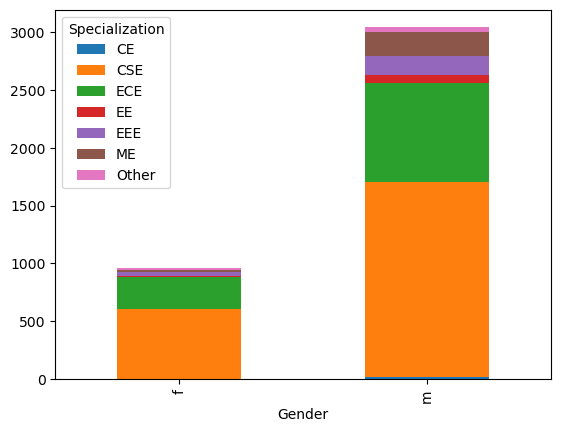

In [45]:
observed.plot(kind='bar',stacked = True)
plt.show()

most of Amcat Aspirants completed their Degree in CSE and ECE and men are more as compare to women.


## Chi-Squared Test for Independence
Tests whether two categorical variables are related or independent.

In [47]:
from scipy.stats import chi2_contingency

pval = chi2_contingency(observed)[1]

if(pval < 0.05):
    print("Reject Null Hypothesis and Gender depend on specialization ")
else:
    print("Fail to Reject Null Hypothesis and Gender does not depend specialization")

Reject Null Hypothesis and Gender depend on specialization 


## Thank You